In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/cleaned_article.csv")
df.head()

,Kategori,Link,article_title,article_text,domain,cleaned_article_text,polarity,subjectivity,tokens,tokens_no_stop,tokens_final,tokens_stemmed,text_final,sentiment_label
0,Finance,https://industri.kontan.co.id/news/pemerintah-...,"Pemerintah Resmi Turunkan Harga Tiket Pesawat,...",Reporter: Leni Wandira | Editor: Wahyu T.Rahma...,kontan,kontancoid jakarta lion group mendukung penuh...,0.089297,0.302210,"['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'me...","['kontancoid', 'jakarta', 'lion', 'group', 'du...",kontancoid jakarta lion group dukung penuh bij...,Positive
1,Incident,https://news.okezone.com/read/2023/10/29/337/2...,Peristiwa 29 Oktober : Pesawat Lion Air Jatuh ...,SEJUMLAH peristiwa terjadi pada 29 Oktober. Sa...,okezone,sejumlah peristiwa terjadi pada oktober salah...,0.134921,0.250794,"['sejumlah', 'peristiwa', 'terjadi', 'pada', '...","['peristiwa', 'oktober', 'salah', 'satunya', '...","['peristiwa', 'oktober', 'salah', 'satunya', '...","['peristiwa', 'oktober', 'salah', 'satu', 'jat...",peristiwa oktober salah satu jatuh pesawat lio...,Positive
2,Incident,https://www.cnnindonesia.com/ekonomi/202306081...,Deret Masalah Penerbangan Lion Air Group Sepan...,Sekretaris Umum PP Muhammadiyah Abdul Mu'ti me...,cnnindonesia,sekretaris umum pp muhammadiyah abdul muti men...,0.033559,0.340945,"['sekretaris', 'umum', 'pp', 'muhammadiyah', '...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...","['sekretaris', 'pp', 'muhammadiyah', 'abdul', ...",sekretaris pp muhammadiyah abdul muti kritik p...,Netral
3,Incident,https://www.antaranews.com/video/3366141/ini-d...,Ini dugaan penyebab kecelakaan pesawat Lion Ai...,Copyright © ANTARA 2023\nDilarang keras mengam...,antaranews,dilarang keras mengambil konten melakukan craw...,0.000000,0.000000,"['dilarang', 'keras', 'mengambil', 'konten', '...","['dilarang', 'keras', 'mengambil', 'konten', '...","['dilarang', 'keras', 'mengambil', 'konten', '...","['larang', 'keras', 'ambil', 'konten', 'crawli...",larang keras ambil konten crawling indeks otom...,Netral
4,Operational,https://haji.kemenag.go.id/v5/detail/tingkatka...,"Tingkatkan Kualitas Layanan, Kemenag - Lion Ai...",21 Feb 2025 oleh Husni Anggoro | dilihat 42259...,kemenag,feb oleh husni anggoro dilihat kali\njakar...,0.144516,0.421348,"['feb', 'oleh', 'husni', 'anggoro', 'dilihat',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...","['feb', 'husni', 'anggoro', 'kali', 'jakarta',...",feb husni anggoro kali jakarta phu direktorat ...,Positive


### BoW and TF-IDF Vectorization

In [4]:
vec_params = {'max_df': 0.75, 'min_df': 2, 'ngram_range': (1, 2)}

# tfidf
tfidf_vectorizer = TfidfVectorizer(**vec_params)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_article_text'])
X_tfidf_dense = X_tfidf.toarray()
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# bow
bow_vectorizer = CountVectorizer(**vec_params)
X_bow = bow_vectorizer.fit_transform(df['cleaned_article_text'])
X_bow_dense = X_bow.toarray()
bow_feature_names = bow_vectorizer.get_feature_names_out()

print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"BoW matrix shape: {X_bow.shape}")

TF-IDF matrix shape: (153, 8714)
BoW matrix shape: (153, 8714)


### Clustering on TF-IDF

In [5]:
true_k = 2
# K-Means
kmeans_model_tfidf = KMeans(n_clusters=true_k, init='k-means++', n_init=10, random_state=42)
df['kmeans_tfidf'] = kmeans_model_tfidf.fit_predict(X_tfidf)
# Agglomerative
agg_model_tfidf = AgglomerativeClustering(n_clusters=true_k, linkage='ward')
df['agg_tfidf'] = agg_model_tfidf.fit_predict(X_tfidf_dense)
# DBSCAN
dbscan_model_tfidf = DBSCAN(eps=1.2, min_samples=2, metric='euclidean')
df['dbscan_tfidf'] = dbscan_model_tfidf.fit_predict(X_tfidf_dense)

### Clustering on BoW

In [ ]:
# K-Means
kmeans_model_bow = KMeans(n_clusters=true_k, init='k-means++', n_init=10, random_state=42)
df['kmeans_bow'] = kmeans_model_bow.fit_predict(X_bow)
# Agglomerative
agg_model_bow = AgglomerativeClustering(n_clusters=true_k, linkage='ward')
df['agg_bow'] = agg_model_bow.fit_predict(X_bow_dense)
# DBSCAN
dbscan_model_bow = DBSCAN(eps=2.5, min_samples=2, metric='euclidean')
df['dbscan_bow'] = dbscan_model_bow.fit_predict(X_bow_dense)

### Dendogram Visualization

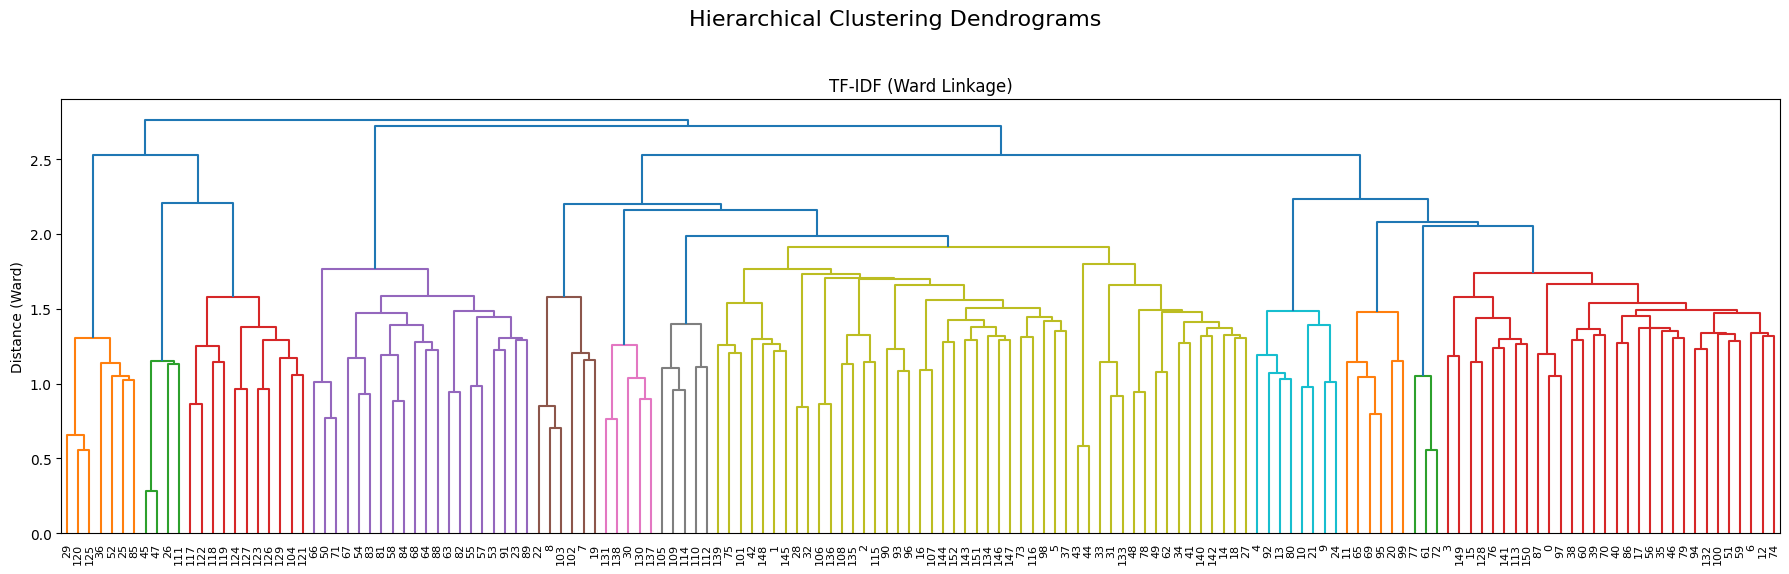

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
fig.suptitle('Hierarchical Clustering Dendrograms', fontsize=16)

# TF-IDF Dendrogram
Z_tfidf = linkage(X_tfidf_dense, method='ward')
dendrogram(Z_tfidf, leaf_rotation=90., leaf_font_size=8., ax=axes)
axes.set_title('TF-IDF (Ward Linkage)')
axes.set_ylabel('Distance (Ward)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

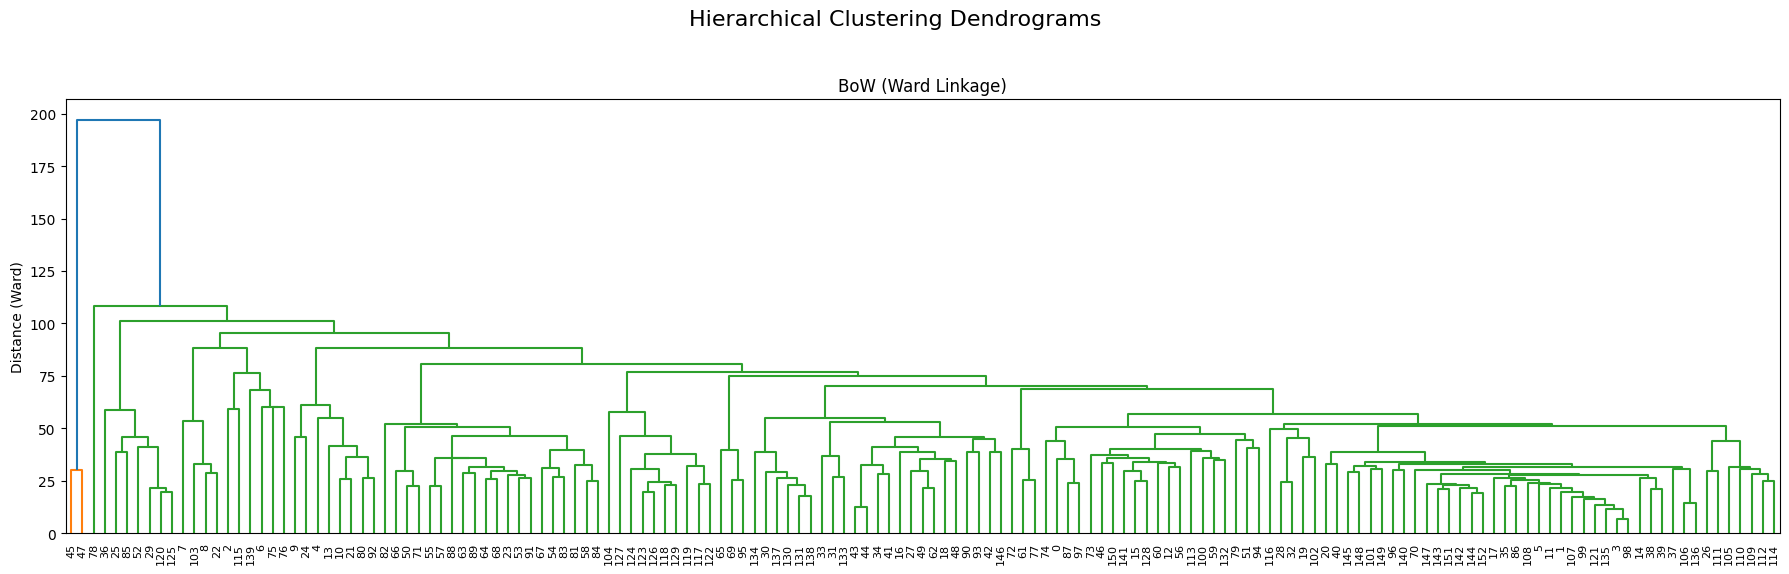

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
fig.suptitle('Hierarchical Clustering Dendrograms', fontsize=16)

# BoW Dendrogram
Z_bow = linkage(X_bow_dense, method='ward')
dendrogram(Z_bow, leaf_rotation=90., leaf_font_size=8., ax=axes)
axes.set_title('BoW (Ward Linkage)')
axes.set_ylabel('Distance (Ward)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### PCA Cluster Plots

In [18]:
# PCA on TF-IDF
pca_tfidf = PCA(n_components=2, random_state=42)
X_pca_tfidf = pca_tfidf.fit_transform(X_tfidf_dense)
df['PCA1_tfidf'] = X_pca_tfidf[:, 0]
df['PCA2_tfidf'] = X_pca_tfidf[:, 1]
# PCA on BoW
pca_bow = PCA(n_components=2, random_state=42)
X_pca_bow = pca_bow.fit_transform(X_bow_dense)
df['PCA1_bow'] = X_pca_bow[:, 0]
df['PCA2_bow'] = X_pca_bow[:, 1]

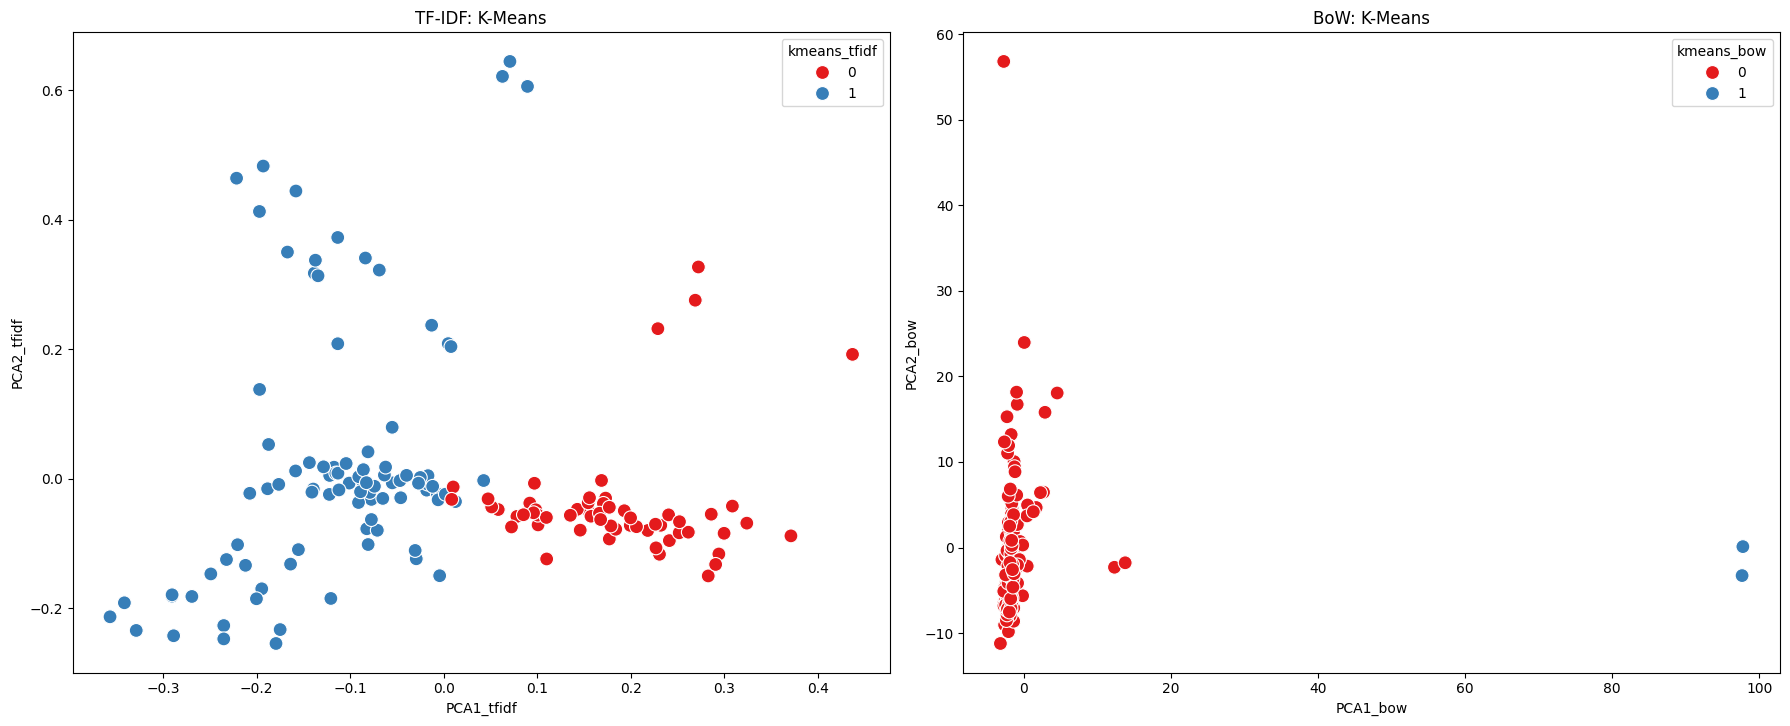

In [29]:
# K-Means Cluster
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=df, x='PCA1_tfidf', y='PCA2_tfidf', hue='kmeans_tfidf', palette='Set1', s=100, ax=axes[0]).set_title('TF-IDF: K-Means')
sns.scatterplot(data=df, x='PCA1_bow', y='PCA2_bow', hue='kmeans_bow', palette='Set1', s=100, ax=axes[1]).set_title('BoW: K-Means')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

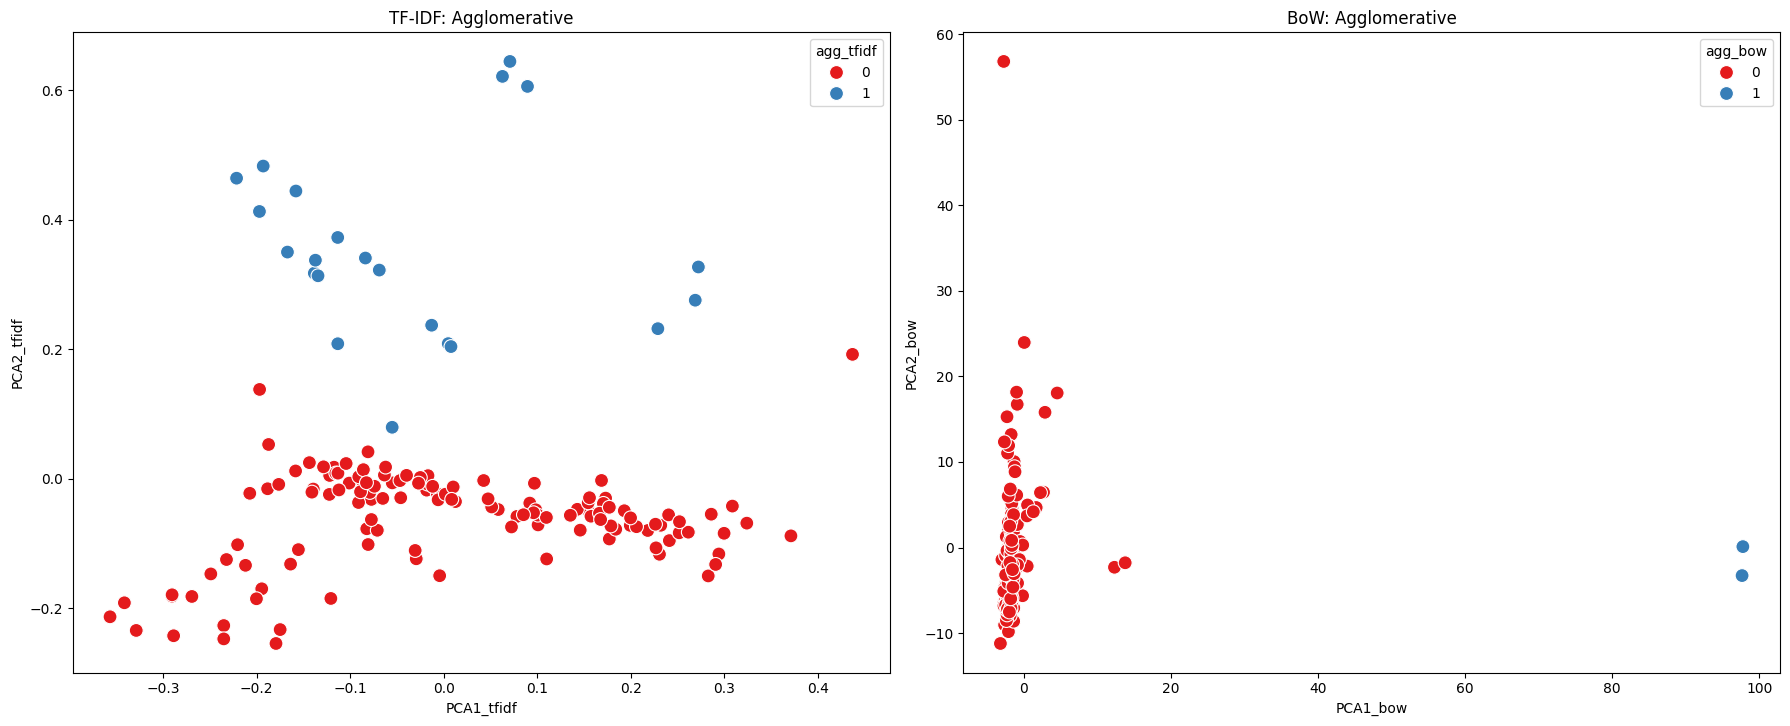

In [30]:
# Agglomerative Cluster
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=df, x='PCA1_tfidf', y='PCA2_tfidf', hue='agg_tfidf', palette='Set1', s=100, ax=axes[0]).set_title('TF-IDF: Agglomerative')
sns.scatterplot(data=df, x='PCA1_bow', y='PCA2_bow', hue='agg_bow', palette='Set1', s=100, ax=axes[1]).set_title('BoW: Agglomerative')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

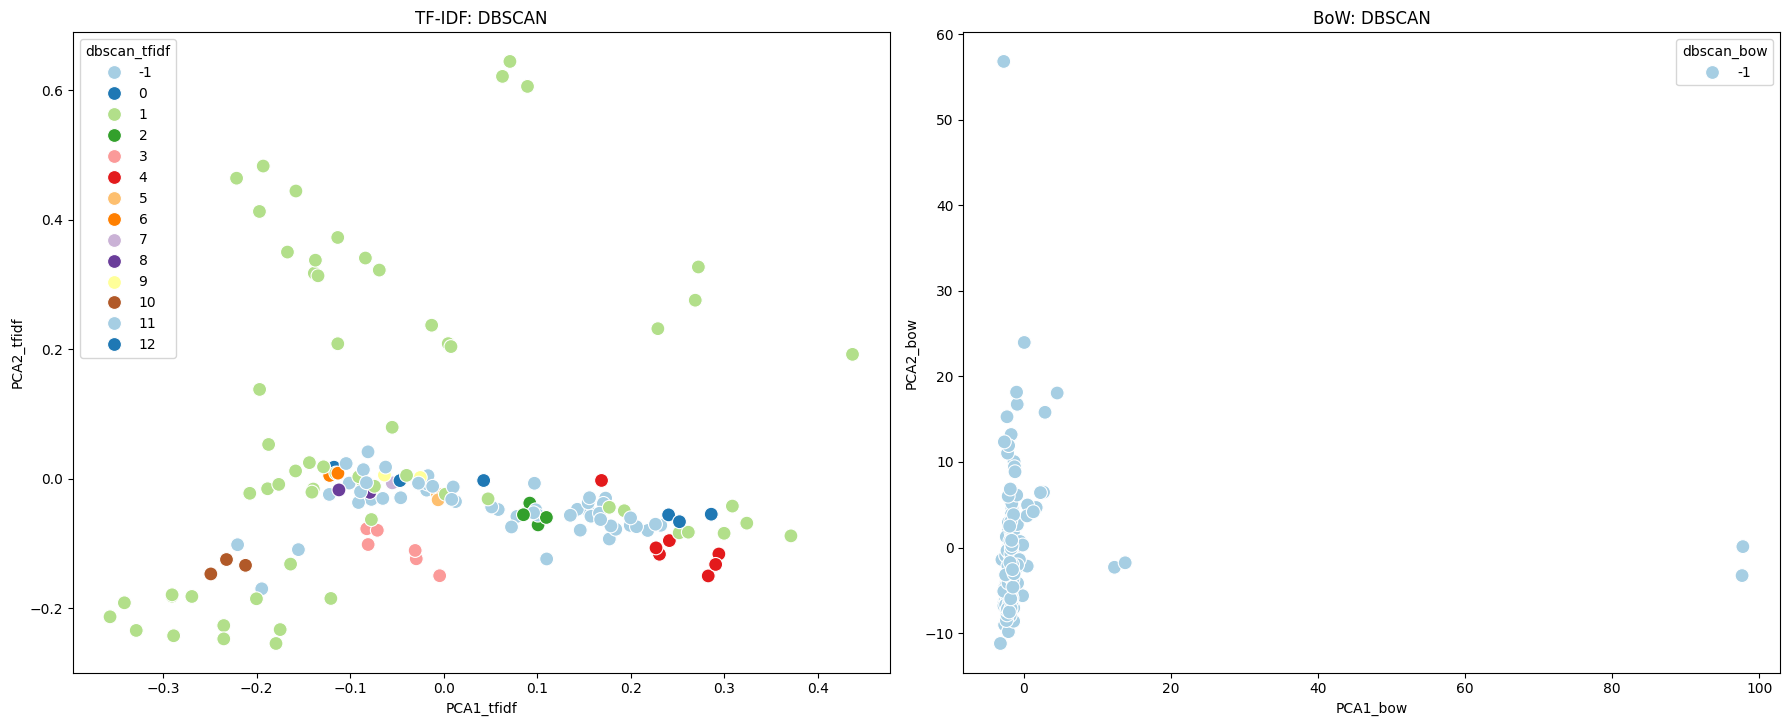

In [31]:
# Agglomerative Cluster
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(data=df, x='PCA1_tfidf', y='PCA2_tfidf', hue='dbscan_tfidf', palette='Paired', s=100, ax=axes[0]).set_title('TF-IDF: DBSCAN')
sns.scatterplot(data=df, x='PCA1_bow', y='PCA2_bow', hue='dbscan_bow', palette='Paired', s=100, ax=axes[1]).set_title('BoW: DBSCAN')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Cluster Size Distribution

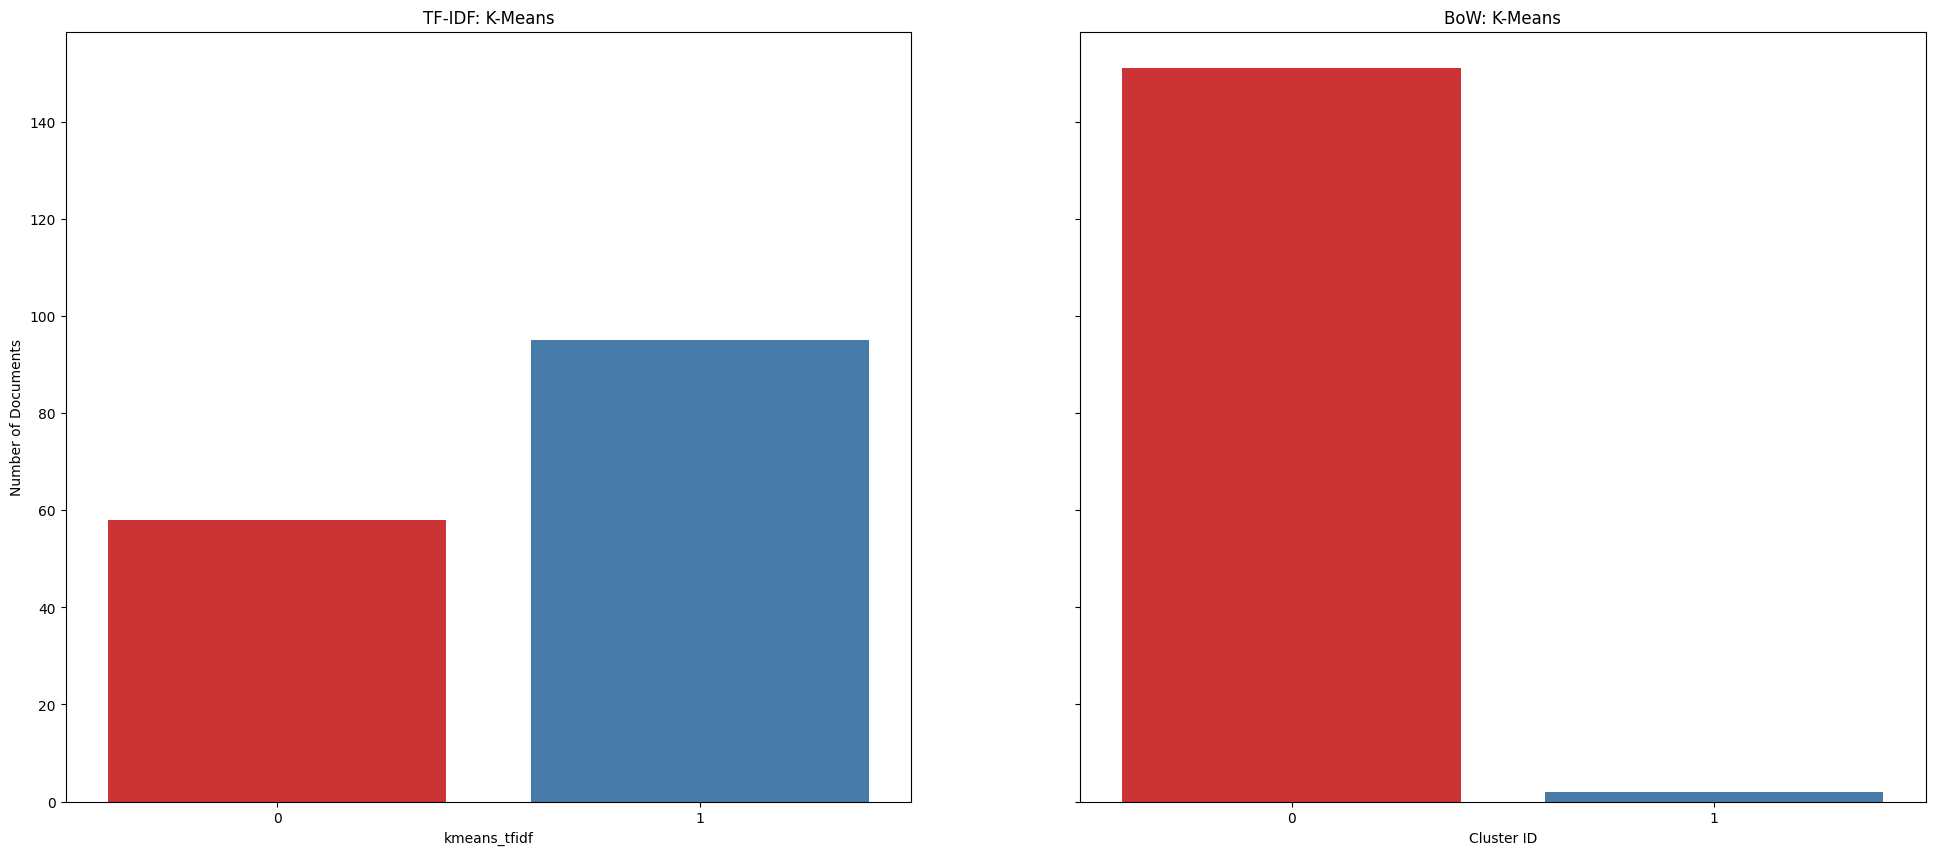

In [40]:
# K-Means TF-IDF
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)
counts = df['kmeans_tfidf'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[0], palette='Set1').set_title('TF-IDF: K-Means')
axes[0].set_ylabel('Number of Documents')

# K-Means BoW
counts = df['kmeans_bow'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[1], palette='Set1').set_title('BoW: K-Means')
axes[1].set_xlabel('Cluster ID')
axes[1].set_ylabel('Number of Documents')

plt.show()

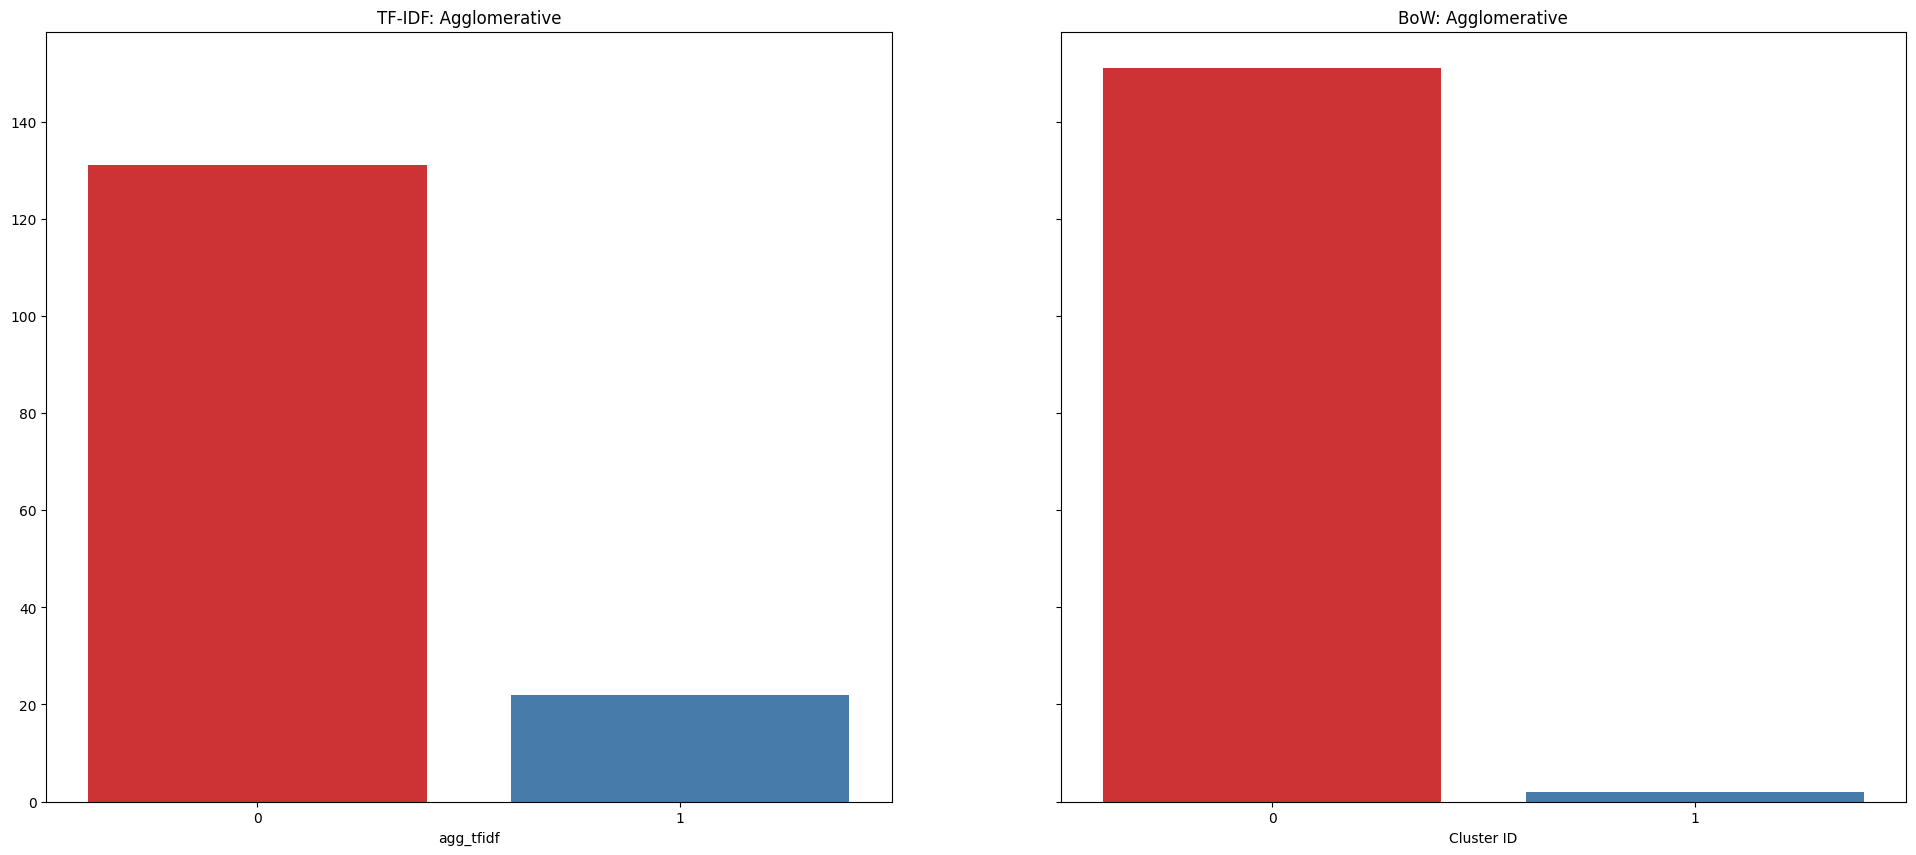

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)

# Agglomerative TF-IDF
counts = df['agg_tfidf'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[0], palette='Set1').set_title('TF-IDF: Agglomerative')

# Agglomerative BoW
counts = df['agg_bow'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[1], palette='Set1').set_title('BoW: Agglomerative')
axes[1].set_xlabel('Cluster ID')

plt.show()

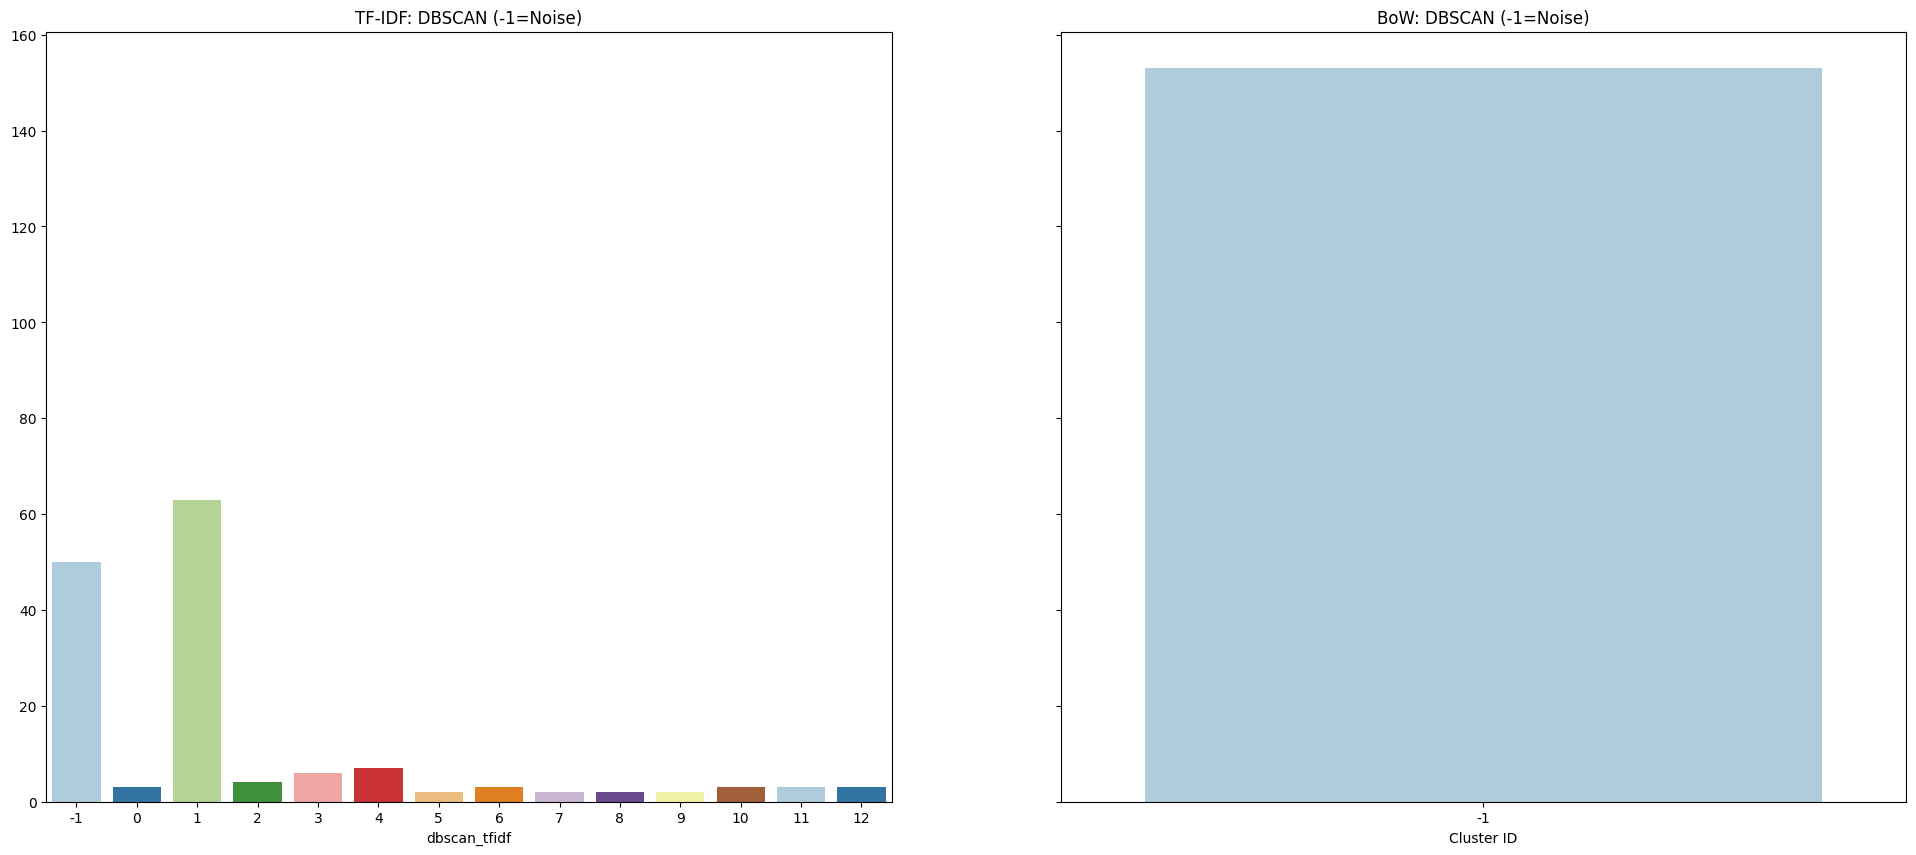

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)

# DBSCAN TF-IDF
counts = df['dbscan_tfidf'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[0], palette='Paired').set_title('TF-IDF: DBSCAN (-1=Noise)')

# DBSCAN BoW
counts = df['dbscan_bow'].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, ax=axes[1], palette='Paired').set_title('BoW: DBSCAN (-1=Noise)')
axes[1].set_xlabel('Cluster ID')

plt.show()

### K-Means Top Terms

In [45]:
def plot_top_terms_kmeans(model, feature_names, title, n_terms=10):
    fig, axes = plt.subplots(1, model.n_clusters, figsize=(16, 6))
    fig.suptitle(title, fontsize=16)
    cluster_centers = model.cluster_centers_

    for i in range(model.n_clusters):
        centroid_terms = cluster_centers[i].argsort()[::-1]
        top_terms = [feature_names[term_index] for term_index in centroid_terms[:n_terms]]
        top_scores = [cluster_centers[i][term_index] for term_index in centroid_terms[:n_terms]]
        
        df_terms = pd.DataFrame({'term': top_terms, 'score': top_scores})
        
        sns.barplot(x='score', y='term', data=df_terms.sort_values(by='score', ascending=False), ax=axes[i])
        axes[i].set_title(f'Cluster {i} Top Terms')
        axes[i].set_xlabel('Mean Score (TF-IDF or Frequency)')
        axes[i].set_ylabel('Term')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

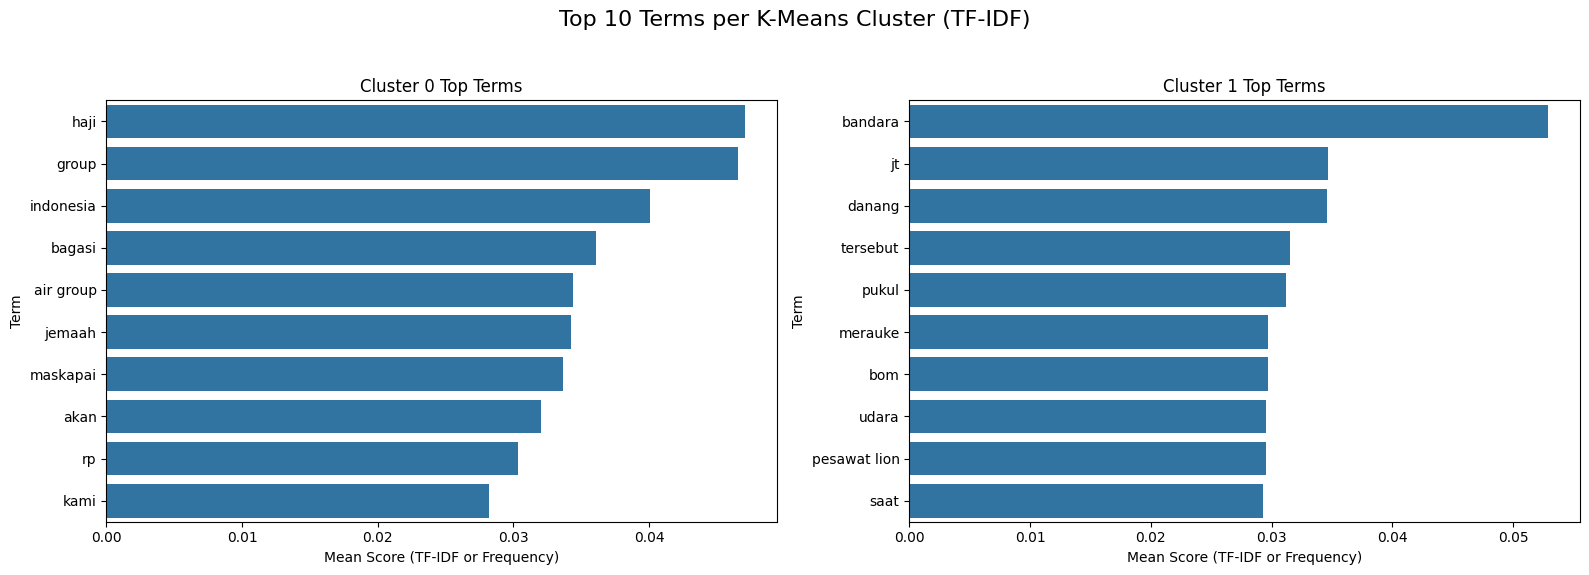

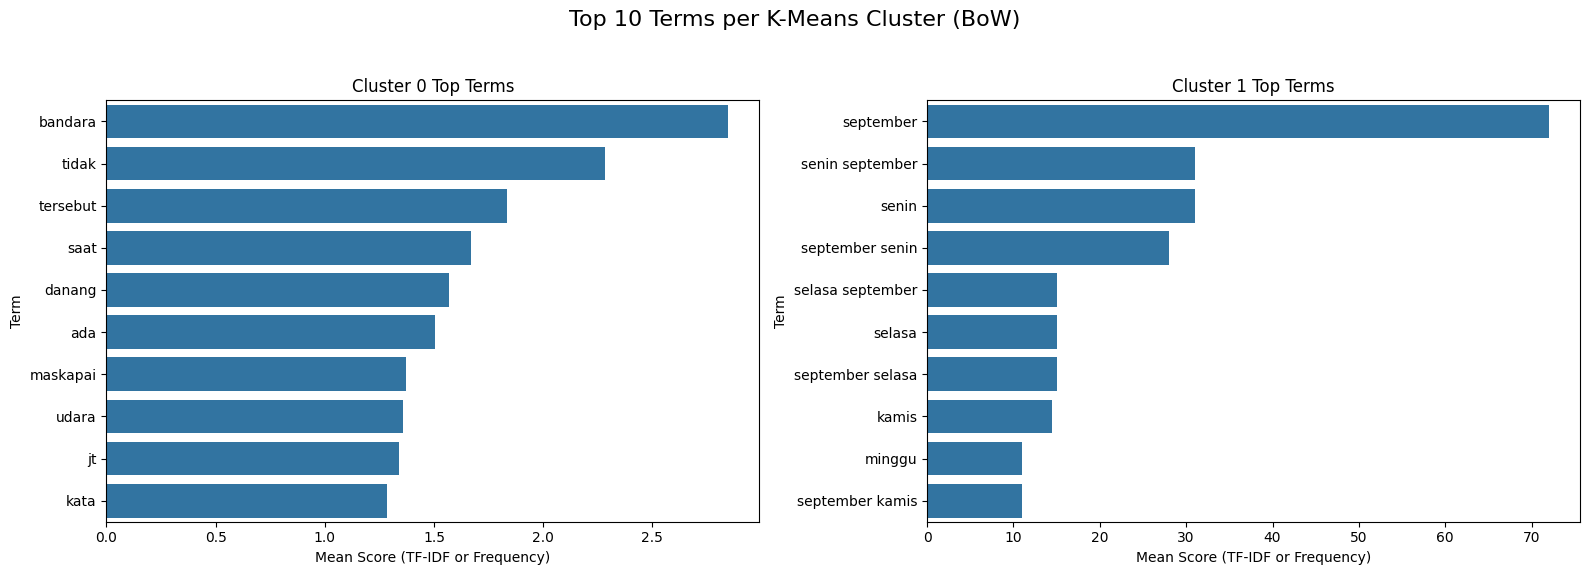

In [46]:
# Plot for TF-IDF K-Means
plot_top_terms_kmeans(kmeans_model_tfidf, tfidf_feature_names, 'Top 10 Terms per K-Means Cluster (TF-IDF)')

# Plot for BoW K-Means
plot_top_terms_kmeans(kmeans_model_bow, bow_feature_names, 'Top 10 Terms per K-Means Cluster (BoW)')

### Word Clouds per Cluster

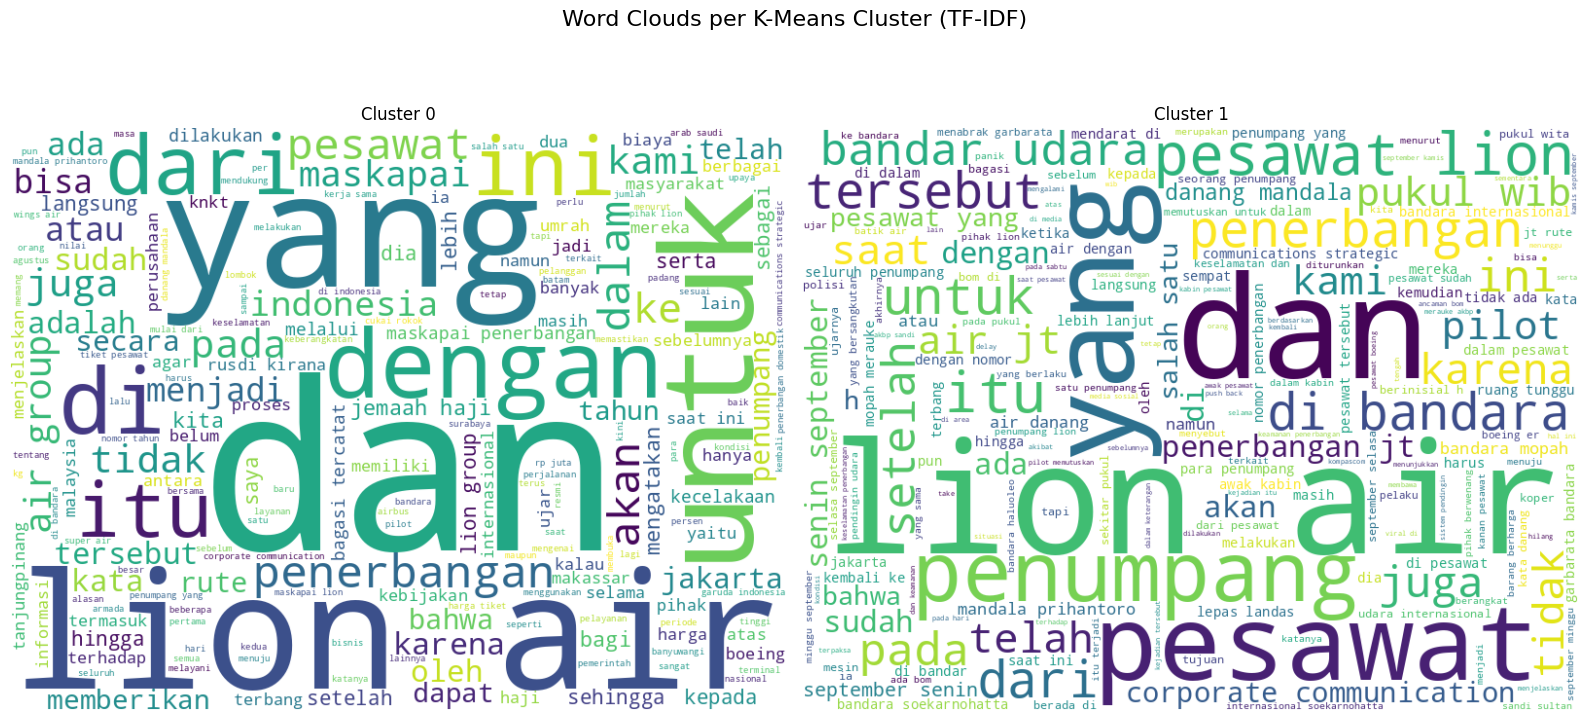

In [48]:
fig, axes = plt.subplots(1, true_k, figsize=(16, 8))
fig.suptitle('Word Clouds per K-Means Cluster (TF-IDF)', fontsize=16)

for i in range(true_k):
    cluster_text = ' '.join(df[df['kmeans_tfidf'] == i]['cleaned_article_text'])
    wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='viridis').generate(cluster_text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Cluster {i}')
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Crosstabs validation

In [50]:
print("\nK-Means (TF-IDF) vs. True Sentiment:")
print(pd.crosstab(df['sentiment_label'], df['kmeans_tfidf']))

print("\nAgglomerative (TF-IDF) vs. True Sentiment:")
print(pd.crosstab(df['sentiment_label'], df['agg_tfidf']))

print("\nDBSCAN (TF-IDF) vs. True Sentiment:")
print(pd.crosstab(df['sentiment_label'], df['dbscan_tfidf']))

print("\nK-Means (BoW) vs. True Sentiment:")
print(pd.crosstab(df['sentiment_label'], df['kmeans_bow']))

print("\nAgglomerative (BoW) vs. True Sentiment:")
print(pd.crosstab(df['sentiment_label'], df['agg_bow']))

print("\nDBSCAN (BoW) vs. True Sentiment:")
print(pd.crosstab(df['sentiment_label'], df['dbscan_bow']))


K-Means (TF-IDF) vs. True Sentiment:
kmeans_tfidf      0   1
sentiment_label        
Negative          2  16
Netral           12  26
Positive         44  53

Agglomerative (TF-IDF) vs. True Sentiment:
agg_tfidf         0   1
sentiment_label        
Negative         17   1
Netral           33   5
Positive         81  16

DBSCAN (TF-IDF) vs. True Sentiment:
dbscan_tfidf     -1    0    1    2    3    4    5    6    7    8    9    10  \
sentiment_label                                                               
Negative           6    0    6    0    3    0    0    0    2    0    0    1   
Netral            10    0   22    1    3    0    0    0    0    0    0    1   
Positive          34    3   35    3    0    7    2    3    0    2    2    1   

dbscan_tfidf      11   12  
sentiment_label            
Negative           0    0  
Netral             0    1  
Positive           3    2  

K-Means (BoW) vs. True Sentiment:
kmeans_bow        0  1
sentiment_label       
Negative         18  0
N